## House Price Range for `house-price` dataset
2022/06/21

In [1]:
import pandas as pd
house_price = pd.read_csv('house_price.csv')
house_price

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [2]:
house_price['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [4]:
house_price['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

+ ### House-Price-Range Setting : Method 1 
### label data 


In [5]:
house_price['sp1'] = house_price['SalePrice']

In [6]:
house_price[['SalePrice', 'sp1']].describe()

,SalePrice,sp1
count,1460.000000,1460.000000
mean,180921.195890,180921.195890
std,79442.502883,79442.502883
min,34900.000000,34900.000000
25%,129975.000000,129975.000000
50%,163000.000000,163000.000000
75%,214000.000000,214000.000000
max,755000.000000,755000.000000


In [7]:
sp = house_price['SalePrice']
house_price['sp1'][sp <= 129975.0] = 0     # SalePrice <= 1st Quartile (Q1)
house_price['sp1'][(129975.0 < sp) & (sp <= 163000.0)] = 1 # Q1 < SalePrice <= Median
house_price['sp1'][(163000.0 < sp) & (sp <= 214000.0)] = 2 # Median < SalePrice <= Q3
house_price['sp1'][214000.0 <= sp] = 3      # 3rd Quartile (Q3) <= SalePrice

house_price['sp1'].value_counts()

C:\Users\Daniel\AppData\Local\Temp/ipykernel_10064/2177175170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_price['sp1'][sp <= 129975.0] = 0     # SalePrice <= 1st Quartile (Q1)
C:\Users\Daniel\AppData\Local\Temp/ipykernel_10064/2177175170.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_price['sp1'][(129975.0 < sp) & (sp <= 163000.0)] = 1 # Q1 < SalePrice <= Median
C:\Users\Daniel\AppData\Local\Temp/ipykernel_10064/2177175170.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

3    367
1    367
0    365
2    361
Name: sp1, dtype: int64

In [8]:
house_price['sp1']

0       2
1       2
2       3
3       1
4       3
       ..
1455    2
1456    2
1457    3
1458    1
1459    1
Name: sp1, Length: 1460, dtype: int64

In [9]:
house_price

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,sp1
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,2
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,2
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,3
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,2
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,2
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,3
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,142125,1


In [10]:
house_price["sp1"].value_counts() #4 class for label 

3    367
1    367
0    365
2    361
Name: sp1, dtype: int64

### Data preprocess & cleaning (step2)

In [11]:
#1.fillna 
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
# house_price.describe().T

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

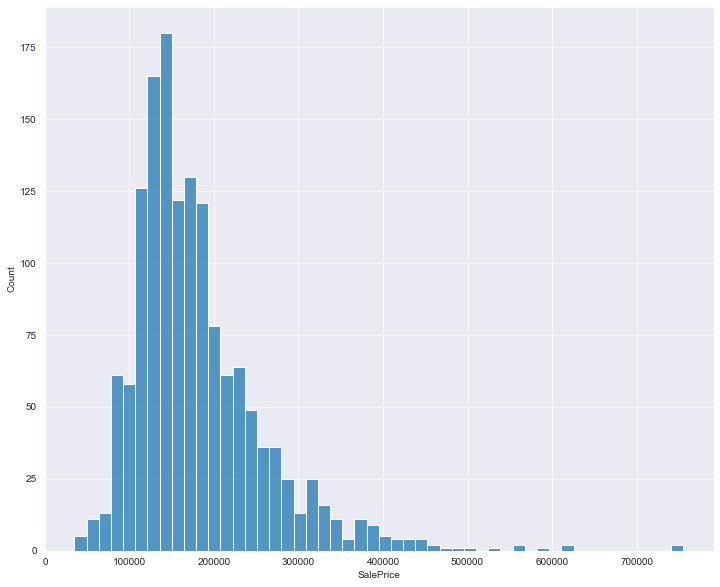

In [13]:
y = house_price["SalePrice"].values
y
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
sns.set_style("darkgrid")
sns.histplot(data = house_price, x="SalePrice", bins=50,cbar=True)
#It seem that majority of the prices are between 100 000 and 250 000

c:\Users\Daniel\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


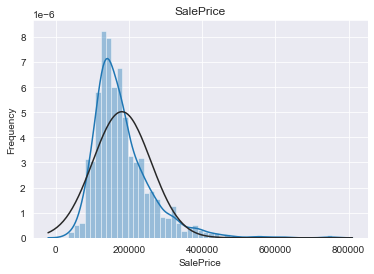

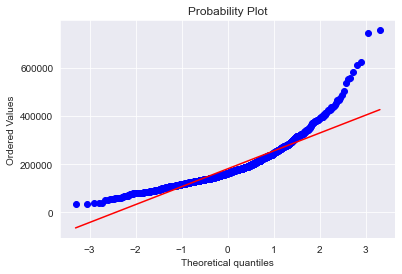

In [14]:
from scipy.stats import norm
from scipy import stats
import seaborn as sns

def feat_plot(data, feat):
    sns.distplot(data[feat], fit=norm );
    plt.ylabel('Frequency')
    plt.title(feat)
    fig = plt.figure()
    res = stats.probplot(data[feat], plot=plt)
    return plt.show()

feat_plot(house_price,'SalePrice')
#可以看出是偏態，後續將修正

偏度(Skewness): 0.94, 峰度(Kurtosis): 1.96


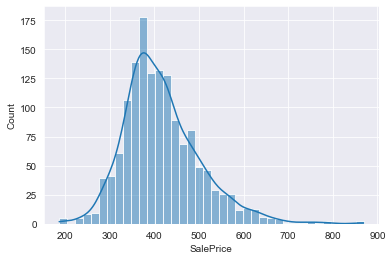

In [15]:
####平方根轉換
transform_data = house_price['SalePrice']**(1/2)
# skewness 與 kurtosis
skewness = round(transform_data.skew(), 2)
kurtosis = round(transform_data.kurt(), 2)
print(f"偏度(Skewness): {skewness}, 峰度(Kurtosis): {kurtosis}")

# 繪製分布圖
sns.histplot(transform_data, kde=True)
plt.show()

偏度(Skewness): 0.67, 峰度(Kurtosis): 1.27


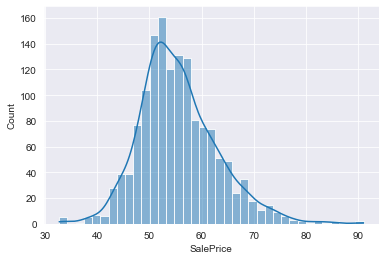

In [16]:
import seaborn as sns
###立方根轉換
transform_data = house_price['SalePrice']**(1/3)
# skewness 與 kurtosis
skewness = round(transform_data.skew(), 2)
kurtosis = round(transform_data.kurt(), 2)
print(f"偏度(Skewness): {skewness}, 峰度(Kurtosis): {kurtosis}")

# 繪製分布圖
sns.histplot(transform_data, kde=True)
plt.show()

In [17]:
##若是要選擇會選擇立方根轉換

### clean for  (Handling the Text and Categorical Columns:)

In [18]:
num_cols=house_price.columns[house_price.dtypes!= "object"]
cat_cols=house_price.columns[house_price.dtypes== "object"]
test_num_cols=house_price.columns[house_price.dtypes!= "object"]
house_price[test_num_cols].isnull().sum().sort_values(ascending=False)

LotFrontage      259
GarageYrBlt       81
MasVnrArea         8
Id                 0
EnclosedPorch      0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
3SsnPorch          0
BedroomAbvGr       0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
KitchenAbvGr       0
FullBath           0
HalfBath           0
MSSubClass         0
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
sp1                0
dtype: int64

In [19]:
house_price["LotFrontage"].fillna(house_price["LotFrontage"].mean(),inplace=True) # we fill the missing values with the mean of the column
print(house_price["LotFrontage"].isnull().sum())
house_price["GarageYrBlt"].fillna(house_price["GarageYrBlt"].median(),inplace=True)
print(house_price["GarageYrBlt"].isnull().sum())

house_price["MasVnrArea"].fillna(house_price["MasVnrArea"].median(), inplace=True)
print(house_price["MasVnrArea"].isnull().sum())

0
0
0


In [20]:
house_price[num_cols].isnull().sum().sort_values(ascending=False)
#Now we do not have any missing value with the numerical columns

Id               0
OpenPorchSF      0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
EnclosedPorch    0
HalfBath         0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
BedroomAbvGr     0
FullBath         0
MSSubClass       0
BsmtFinSF1       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF2       0
BsmtHalfBath     0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
sp1              0
dtype: int64

In [21]:
house_price[cat_cols].isnull().sum().sort_values(ascending=False)/len(house_price[cat_cols])

PoolQC           0.995205
MiscFeature      0.963014
Alley            0.937671
Fence            0.807534
FireplaceQu      0.472603
GarageType       0.055479
GarageCond       0.055479
GarageQual       0.055479
GarageFinish     0.055479
BsmtFinType2     0.026027
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtQual         0.025342
BsmtCond         0.025342
MasVnrType       0.005479
Electrical       0.000685
Functional       0.000000
KitchenQual      0.000000
CentralAir       0.000000
HeatingQC        0.000000
Heating          0.000000
PavedDrive       0.000000
SaleType         0.000000
MSZoning         0.000000
Street           0.000000
Condition2       0.000000
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
BldgType         0.000000
Foundation       0.000000
HouseStyle       0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st 

In [22]:
# We will drop columns which have more than %80 missing values:
house_price.drop(["PoolQC","MiscFeature","Alley","Fence"],axis=1, inplace=True)
house_price.isnull().sum().sort_values(ascending=False)

FireplaceQu     690
GarageType       81
GarageCond       81
GarageFinish     81
GarageQual       81
               ... 
Exterior2nd       0
Exterior1st       0
RoofMatl          0
RoofStyle         0
sp1               0
Length: 78, dtype: int64

In [23]:
#FireplaceQu  has % over %40 missing value, but it has a couple of categories that we can fill
house_price["FireplaceQu"].value_counts()
house_price["FireplaceQu"].fillna("Gd",inplace=True)
house_price["FireplaceQu"].isnull().sum()



0

In [24]:
house_price["GarageType"].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [25]:
house_price["GarageType"].fillna("Attchd",inplace=True) #Lets fill the missing values with the most common value

house_price["GarageFinish"].fillna("Unf",inplace=True)

house_price["GarageCond"].fillna("TA",inplace=True)

house_price["GarageQual"].fillna("TA",inplace=True)


In [26]:
house_price.isnull().sum().sort_values(ascending=False) #The rest of the missing values are so few, so we can just drop raws with missing values

BsmtFinType2    38
BsmtExposure    38
BsmtFinType1    37
BsmtQual        37
BsmtCond        37
                ..
Exterior2nd      0
Exterior1st      0
RoofMatl         0
RoofStyle        0
sp1              0
Length: 78, dtype: int64

In [27]:
house_price["BsmtFinType2"].fillna("Unf",inplace=True)
house_price["BsmtExposure"].fillna("No",inplace=True)
house_price["BsmtFinType1"].fillna("Unf",inplace=True)
house_price["BsmtQual"].fillna("TA",inplace=True)
house_price["BsmtCond"].fillna("TA",inplace=True)
house_price["MasVnrType"].fillna("None",inplace=True)
house_price["Electrical"].fillna("SBrkr",inplace=True)

In [28]:
house_price.isnull().sum().sort_values(ascending=False) 
#Now we do  ot have nay missing value in categorical columns of trainin set

Id             0
HalfBath       0
FireplaceQu    0
Fireplaces     0
Functional     0
              ..
MasVnrArea     0
MasVnrType     0
Exterior2nd    0
Exterior1st    0
sp1            0
Length: 78, dtype: int64

In [29]:
house_price

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,sp1
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2008,WD,Normal,208500,2
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,5,2007,WD,Normal,181500,2
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,9,2008,WD,Normal,223500,3
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,2,2006,WD,Abnorml,140000,1
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,12,2008,WD,Normal,250000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,8,2007,WD,Normal,175000,2
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2010,WD,Normal,210000,2
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,2500,5,2010,WD,Normal,266500,3
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,4,2010,WD,Normal,142125,1


In [30]:
####

In [31]:
cat_cols= house_price.columns[house_price.dtypes== "object"]
cat_cols


Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [32]:
house_price_cat_cols = house_price.columns[house_price.dtypes=="object"]
house_price_cat_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [33]:
house_price[cat_cols].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [34]:
house_price= pd.get_dummies(house_price,columns =["MSZoning","Street","LotShape","LandContour",'LandSlope', 
                                    'LotConfig','Neighborhood', 'Condition1', 'BldgType', 
                                    'RoofStyle',  'MasVnrType', 'ExterQual', 
                                    'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                                    'BsmtFinType1', 'HeatingQC', 'CentralAir', 
                                    'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 
                                    'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],drop_first =True)
house_price.head() #Now we transform all of the categorical  columns into numerical values

,Id,MSSubClass,LotFrontage,LotArea,Utilities,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,AllPub,Norm,2Story,7,5,2003,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,AllPub,Norm,1Story,6,8,1976,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,AllPub,Norm,2Story,7,5,2001,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,AllPub,Norm,2Story,7,5,1915,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,AllPub,Norm,2Story,8,5,2000,...,0,0,0,0,1,0,0,0,1,0


In [35]:
house_price.drop(["Exterior2nd","Condition2","BsmtFinType2","Utilities", 
           'HouseStyle', 'RoofMatl', 'Exterior1st',  'Heating', 
           'Electrical', 'Functional', 'GarageQual'],axis=1,inplace=True) # We drop 3 columns because they have the same information with some columns
house_price.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,1,0,0,0,1,0


In [36]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 164 entries, Id to SaleCondition_Partial
dtypes: float64(3), int64(36), uint8(125)
memory usage: 623.2 KB


In [37]:
house_price.describe().T


,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.500000,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.000000,70.00,190.0
LotFrontage,1460.0,70.049958,22.024023,21.0,60.00,70.049958,79.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.500000,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.000000,7.00,10.0
...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,1460.0,0.002740,0.052289,0.0,0.00,0.000000,0.00,1.0
SaleCondition_Alloca,1460.0,0.008219,0.090317,0.0,0.00,0.000000,0.00,1.0
SaleCondition_Family,1460.0,0.013699,0.116277,0.0,0.00,0.000000,0.00,1.0
SaleCondition_Normal,1460.0,0.820548,0.383862,0.0,1.00,1.000000,1.00,1.0


#### Feature select

In [38]:
from sklearn.feature_selection import SelectPercentile , f_regression

x_f = house_price.drop(['sp1'],axis=1)
y_f = house_price['sp1']

for i in range(0,101,10):
    fs = SelectPercentile(score_func= f_regression,percentile=i) 
    fs.fit(x_f, y_f)
    select_feature = fs.fit_transform(x_f, y_f).shape
    print("percentile = ",i,",","保留的特徵數:",select_feature[1]) 

percentile =  0 , 保留的特徵數: 0
percentile =  10 , 保留的特徵數: 17
percentile =  20 , 保留的特徵數: 33
percentile =  30 , 保留的特徵數: 49
percentile =  40 , 保留的特徵數: 65
percentile =  50 , 保留的特徵數: 81
percentile =  60 , 保留的特徵數: 98
percentile =  70 , 保留的特徵數: 114
percentile =  80 , 保留的特徵數: 130
percentile =  90 , 保留的特徵數: 146
percentile =  100 , 保留的特徵數: 163


c:\Users\Daniel\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\feature_selection\_base.py:92: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warn(


In [39]:
fs = SelectPercentile(score_func=f_regression,percentile=80)  #percentile = 保留多少百分比
fs.fit(x_f, y_f) 
select_feature = fs.fit_transform(x_f, y_f).shape
print("percentile = ",80,",","保留的特徵數:",select_feature[1])  
print("使用的特徵值(根據原data順序):",fs.get_support([ x_f.columns.values]),end="\n")
select_feature_list = []
for i in fs.get_support([ x_f.columns.values]):
    select_feature_list.append(x_f.columns[i])
print("使用變數欄位的名稱: \n",select_feature_list)
df_select = pd.DataFrame(fs.transform(x_f),columns=select_feature_list)
df_select #將df_select作為變數 !

percentile =  80 , 保留的特徵數: 130
使用的特徵值(根據原data順序): [  1   2   3   4   5   6   7   8   9  11  12  13  14  15  16  17  19  20
  21  22  23  24  25  26  27  28  29  30  31  32  33  35  37  38  39  40
  41  43  44  45  46  47  49  51  54  56  57  58  59  60  61  62  63  64
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  87  88  89  91  93  96  97  98  99 100 101 102 103 105 106 107 108 111
 112 113 114 115 117 118 119 120 121 122 123 124 125 126 128 129 130 131
 132 134 135 136 137 139 140 141 142 143 144 146 147 148 149 151 155 156
 157 158 161 162]
使用變數欄位的名稱: 
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPor

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_Con,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Normal,SaleCondition_Partial
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,150.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,284.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,434.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,540.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,490.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60.0,62.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,953.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1456,20.0,85.0,13175.0,6.0,6.0,1978.0,1988.0,119.0,790.0,589.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1457,70.0,66.0,9042.0,7.0,9.0,1941.0,2006.0,0.0,275.0,877.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1458,20.0,68.0,9717.0,5.0,6.0,1950.0,1996.0,0.0,49.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


### Machine learning for building at least 5 classification models , and show their accuracy scores & Confusion Matrices.

In [38]:
#####

In [40]:
# define the multinomial logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn import metrics

X = df_select # df_select為篩選變數後的變數欄位表格
Y = house_price['sp1']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

# define the model evaluation procedure
lr = LogisticRegression()
lr.fit(X_train,Y_train)
print("training score:",(lr.score(X_train,Y_train))*100)
print("testing score:",(lr.score(X_test,Y_test))*100)
# print("截距:",lr.intercept_)
# print("係數:",lr.coef_)

predictions = lr.predict(X_test)
lr_cm = metrics.confusion_matrix(Y_test, predictions)
lr_confuse_matrix = pd.DataFrame(lr_cm)
print()
print("Test data LogisticRegression classification confusion Matrix : ")
print(lr_confuse_matrix)
# print(lr_cm)



training score: 95.63356164383562
testing score: 96.91780821917808

Test data LogisticRegression classification confusion Matrix : 
    0   1   2   3
0  81   0   0   0
1   2  77   1   0
2   0   1  56   4
3   0   0   1  69


c:\Users\Daniel\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()
GNB.fit(X_train,Y_train)
print("training score:",(GNB.score(X_train,Y_train))*100)
print("testing score:",(GNB.score(X_test,Y_test))*100)
# print("截距:",lr.intercept_)
# print("係數:",lr.coef_)

predictions = GNB.predict(X_test)
GNB_cm = metrics.confusion_matrix(Y_test, predictions)
GNB_confuse_matrix = pd.DataFrame(GNB_cm)
print()
print("Test data GaussianNB classification confusion Matrix : ")
print(GNB_confuse_matrix)
# print(lr_cm)


training score: 79.7945205479452
testing score: 80.47945205479452

Test data GaussianNB classification confusion Matrix : 
    0   1   2   3
0  77   4   0   0
1  37  40   3   0
2   0   3  55   3
3   0   0   7  63


In [42]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)
print("training score:",(knn.score(X_train,Y_train))*100)
print("testing score:",(knn.score(X_test,Y_test))*100)
# print("截距:",lr.intercept_)
# print("係數:",lr.coef_)

predictions = knn.predict(X_test)
knn_cm = metrics.confusion_matrix(Y_test, predictions)
knn_confuse_matrix = pd.DataFrame(knn_cm)
print()
print("Test data KNeighborsClassifier classification confusion Matrix : ")
print(knn_confuse_matrix)
# print(lr_cm)


training score: 99.22945205479452
testing score: 98.63013698630137

Test data KNeighborsClassifier classification confusion Matrix : 
    0   1   2   3
0  80   1   0   0
1   1  79   0   0
2   0   0  60   1
3   0   0   1  69


In [43]:
from sklearn import tree
DTC = tree.DecisionTreeClassifier()
DTC.fit(X_train,Y_train)

print("training score:",(DTC.score(X_train,Y_train))*100)
print("testing score:",(DTC.score(X_test,Y_test))*100)

predictions = DTC.predict(X_test)
DTC_cm = metrics.confusion_matrix(Y_test, predictions)
DTC_confuse_matrix = pd.DataFrame(DTC_cm)
print()
print("Test data DecisionTreeClassifier classification confusion Matrix : ")
print(DTC_confuse_matrix)
# print(lr_cm)

training score: 100.0
testing score: 100.0

Test data DecisionTreeClassifier classification confusion Matrix : 
    0   1   2   3
0  81   0   0   0
1   0  80   0   0
2   0   0  61   0
3   0   0   0  70


In [44]:
from sklearn import  ensemble

# 建立 random forest 模型
forest = ensemble.RandomForestClassifier(n_estimators = 100)
forest.fit(X_train,Y_train)

print("training score:",(forest.score(X_train,Y_train))*100)
print("testing score:",(forest.score(X_test,Y_test))*100)

predictions = forest.predict(X_test)
forest_cm = metrics.confusion_matrix(Y_test, predictions)
forest_confuse_matrix = pd.DataFrame(forest_cm)
print()
print("Test data RandomForestClassifier classification confusion Matrix : ")
print(forest_confuse_matrix)

training score: 100.0
testing score: 97.26027397260275

Test data RandomForestClassifier classification confusion Matrix : 
    0   1   2   3
0  80   1   0   0
1   0  76   4   0
2   0   2  59   0
3   0   1   0  69


In [45]:
from sklearn import  ensemble

ETC = ensemble.ExtraTreesClassifier(n_estimators = 20)
ETC.fit(X_train,Y_train)

print("training score:",(ETC.score(X_train,Y_train))*100)
print("testing score:",(ETC.score(X_test,Y_test))*100)

predictions = ETC.predict(X_test)
ETC_cm = metrics.confusion_matrix(Y_test, predictions)
ETC_confuse_matrix = pd.DataFrame(ETC_cm)
print()
print("Test data ExtraTreesClassifier classification confusion Matrix : ")
print(ETC_confuse_matrix)

training score: 100.0
testing score: 84.58904109589042

Test data ExtraTreesClassifier classification confusion Matrix : 
    0   1   2   3
0  76   5   0   0
1  21  52   7   0
2   0   3  56   2
3   0   1   6  63


In [48]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier( hidden_layer_sizes=(256,128,128,128),random_state=1) #activation='relu', solver='sgd', hidden_layer_sizes=(50,50), random_state=1,max_iter=50
mlp.fit(X_train,Y_train)
print("training score:",(mlp.score(X_train,Y_train))*100)
print("testing score:",(mlp.score(X_test,Y_test))*100)

predictions = mlp.predict(X_test)
mlp_cm = metrics.confusion_matrix(Y_test, predictions)
mlp_confuse_matrix = pd.DataFrame(mlp_cm)
print()
print("Test data MLPClassifier classification confusion Matrix : ")
print(mlp_confuse_matrix)

training score: 89.98287671232876
testing score: 90.75342465753424

Test data MLPClassifier classification confusion Matrix : 
    0   1   2   3
0  71  10   0   0
1   6  74   0   0
2   0   8  51   2
3   0   0   1  69


In [49]:
### referece https://www.796t.com/content/1548189913.html

# from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier

clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], 
                          meta_classifier=lr)

sclf.fit(X_train,Y_train)            
print("training score:",(sclf.score(X_train,Y_train))*100)
print("testing score:",(sclf.score(X_test,Y_test))*100)

predictions = sclf.predict(X_test)
sclf_cm = metrics.confusion_matrix(Y_test, predictions)
sclf_confuse_matrix = pd.DataFrame(sclf_cm)
print()
print("Test data StackingClassifier classification confusion Matrix : ")
print(sclf_confuse_matrix)

training score: 100.0
testing score: 96.57534246575342

Test data StackingClassifier classification confusion Matrix : 
    0   1   2   3
0  79   2   0   0
1   2  75   3   0
2   0   1  60   0
3   0   0   2  68
